In [70]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

In [71]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [72]:
model.layers.pop()

In [73]:
for l in model.layers:
    if l.name == 'fc21':
        l.trainable = True
    else:
        l.trainable =False
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [74]:
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

new_layer = Dense(2, activation='softmax', name='my_dense')

inp = model.input
out = new_layer(model.layers[-1].output)

model2 = Model(inp, out)
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [75]:
from keras.optimizers import RMSprop
# model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [82]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/valid',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

model2.fit_generator(
        train_generator,
        steps_per_epoch=500,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=500)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/2
500/500 [==============================] - 349s - loss: 0.1678 - acc: 0.9336 - val_loss: 0.0644 - val_acc: 0.9761
Epoch 2/2
500/500 [==============================] - 349s - loss: 0.1651 - acc: 0.9354 - val_loss: 0.0648 - val_acc: 0.9731


In [81]:
model2.optimizer.lr 
# optimizer=RMSprop(lr=0.01)

0.01

In [8]:
# model2.save_weights('/home/ubuntu/git/learningWithKaggle/ft2_resnet98.h5')
model2.load_weights('/home/ubuntu/git/learningWithKaggle/ft2_resnet98.h5')

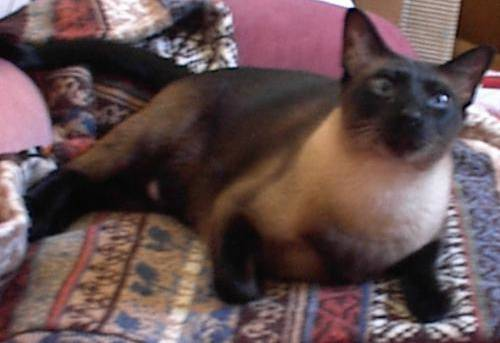

In [14]:
import glob
from IPython.display import display, Image
from keras.preprocessing import image as kimage
import skimage.io

img_path = '/home/ubuntu/data/dogscats/valid/cats/cat.4510.jpg'
# img_path = path +'/11023.jpg'
# img_path = path +'/110.jpg'
# rand_img = np.random.choice(glob.glob(path + '/*.jpg'))

Image(filename=img_path) 


In [11]:
img = skimage.io.imread(img_path)
img.shape

(343, 500, 3)

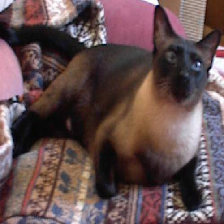

(1, 224, 224, 3)


In [12]:
img = kimage.load_img(img_path, target_size=(224, 224))
display(img)
x = kimage.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
print(x.shape)


In [59]:
# testing on the validation set, needs changing for the prediction on the test set as no classes
test_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/valid',
        target_size=(224, 224),
        batch_size=8,
        shuffle=False,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [60]:
preds = model2.predict_generator(test_generator,250)
files = np.array([test_generator.filenames]).T
preds
# all_preds = np.hstack((np.round(preds,3), files))
# np.set_printoptions(threshold=np.nan)
# print(all_preds)

array([[  8.53889585e-01,   1.46110386e-01],
       [  9.83439386e-01,   1.65606067e-02],
       [  9.98842061e-01,   1.15799042e-03],
       ..., 
       [  9.43042505e-06,   9.99990582e-01],
       [  1.47216667e-06,   9.99998569e-01],
       [  6.23210610e-07,   9.99999404e-01]], dtype=float32)

In [83]:
real_test_gen = test_datagen.flow_from_directory(
        '/home/ubuntu/data/dogscats/test',
        target_size=(224, 224),
        batch_size=10,
        shuffle=False,
        class_mode=None)

Found 12500 images belonging to 1 classes.


In [84]:
test_pred_all = model2.predict_generator(real_test_gen,1250)
files = np.array([real_test_gen.filenames]).T
all_preds = np.hstack((np.round(test_pred_all,decimals=3), files))

In [85]:
test_pred_all
real_test_gen.filenames[0:2], test_pred_all[0:2]

(['unknown/10438.jpg', 'unknown/12309.jpg'],
 array([[  1.79901544e-04,   9.99820173e-01],
        [  9.99869108e-01,   1.30844390e-04]], dtype=float32))

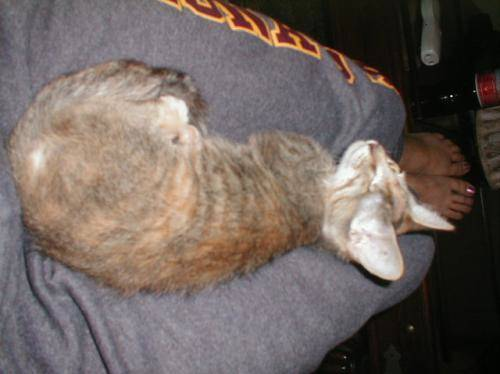

In [86]:
img_path = '/home/ubuntu/data/dogscats/test/unknown/4916.jpg'
# dog, cat, cat, dog, dog, dog, dog
Image(filename=img_path) 

In [54]:
all_preds[:,1]

array(['1.0', '0.0', '0.0', ..., '0.0', '0.952000021935', '0.0'], 
      dtype='|S32')

In [87]:
# isdog.clip(min=0.02, max=0.98)
isdog = test_pred_all[:,1]
isdog = np.clip(isdog, 0.02, 0.98, out=isdog)

In [88]:
filenames = real_test_gen.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])


In [89]:
subm = np.stack([ids,isdog], axis=1)
subm[:6]


array([[  1.04380000e+04,   9.80000019e-01],
       [  1.23090000e+04,   1.99999996e-02],
       [  1.02400000e+04,   1.99999996e-02],
       [  1.08510000e+04,   9.80000019e-01],
       [  1.12690000e+04,   9.80000019e-01],
       [  5.69800000e+03,   9.80000019e-01]])

In [90]:
%cd /home/ubuntu/data/dogscats/submissions

submission_file_name = 'submis_resnet_RMSprop2.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/data/dogscats/submissions


In [91]:

from IPython.display import FileLink

FileLink('/home/ubuntu/data/dogscats/submissions/'+submission_file_name)

/home/ubuntu/data/dogscats/submissions/submis_resnet_RMSprop2.csv

In [92]:
# Ensemble a few of the results, using mean
%cd /home/ubuntu/data/dogscats/submissions

resnet1 = np.genfromtxt('submis_resnet_adam1_0.08.csv', delimiter=',', usecols=range(2), skip_header=1)
resnet2 = np.genfromtxt('submis_resnet_adam2.csv', delimiter=',', usecols=range(2), skip_header=1)
resnet3 = np.genfromtxt('submis_resnet_RMSprop1.csv', delimiter=',', usecols=range(2), skip_header=1)
resnet4 = np.genfromtxt('submis_resnet_RMSprop2.csv', delimiter=',', usecols=range(2), skip_header=1)


# resnet1.shape


/home/ubuntu/data/dogscats/submissions


In [93]:
col1 = resnet1[:,1]
col2 = resnet2[:,1]
col3 = resnet3[:,1]
col4 = resnet4[:,1]
labels = resnet1[:,0]

In [110]:
isdog = np.stack((col1, col2, col3, col4), axis=-1).mean(axis=1)
isdog = np.clip(isdog, 0.015, 0.985, out=isdog)

In [111]:
isdog.shape

(12500,)

In [112]:
subm = np.stack([labels,isdog], axis=1)
subm[:6]

array([[  1.04380000e+04,   9.80000000e-01],
       [  1.23090000e+04,   2.00000000e-02],
       [  1.02400000e+04,   2.00000000e-02],
       [  1.08510000e+04,   9.80000000e-01],
       [  1.12690000e+04,   9.80000000e-01],
       [  5.69800000e+03,   9.80000000e-01]])

In [113]:
submission_file_name = 'submis_resnet_ensemble_985.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')
FileLink('/home/ubuntu/data/dogscats/submissions/'+submission_file_name)

/home/ubuntu/data/dogscats/submissions/submis_resnet_ensemble_985.csv